In [81]:
#Rossmann
import pandas as pd

store = pd.read_csv('data/store.csv')
store.shape

(1115, 10)

In [82]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [84]:
train = pd.read_csv('data/train.csv')
train['Date'] = pd.to_datetime(train['Date'], format='%Y-%m-%d')
train.shape

/Users/bahar/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(637774, 9)

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637774 entries, 0 to 637773
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           637774 non-null  datetime64[ns]
 1   Store          618473 non-null  float64       
 2   DayOfWeek      618757 non-null  float64       
 3   Sales          618747 non-null  float64       
 4   Customers      618683 non-null  float64       
 5   Open           618588 non-null  float64       
 6   Promo          618580 non-null  float64       
 7   StateHoliday   618520 non-null  object        
 8   SchoolHoliday  618437 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 43.8+ MB


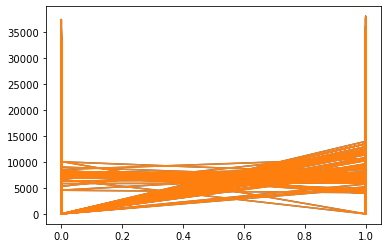

In [90]:
import matplotlib.pyplot as plt
fig = plt.figure()

plt.plot(train["Promo"], train["Sales"])
plt.plot(train["Promo"], train["Sales"])

plt.show()

In [74]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [68]:
store_new = store.copy()

store_new['CompetitionDistance'] = store_new['CompetitionDistance'].fillna(0)
store_new['CompetitionOpenSinceMonth'] = store_new['CompetitionOpenSinceMonth'].fillna(0)
competition_year_mode = store_new['CompetitionOpenSinceYear'].mode().iloc[0]
store_new['CompetitionOpenSinceYear'] = store_new['CompetitionOpenSinceYear'].fillna(competition_year_mode)
store_new['Promo2SinceWeek'] = store_new['Promo2SinceWeek'].fillna(0)
promo2year_mode = store_new['Promo2SinceYear'].mode().iloc[0]
store_new['Promo2SinceYear'] = store_new['Promo2SinceYear'].fillna(promo2year_mode)
promo_interval_mode = store_new['PromoInterval'].mode().iloc[0]
store_new['PromoInterval'] = store_new['PromoInterval'].fillna(promo_interval_mode)

store_new.shape

(1115, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [61]:
train.groupby('Store').agg(total_sales = ('Sales', 'mean')).sort_values(['total_sales'], ascending=False)

,total_sales
Store,
262.0,20647.987061
817.0,18793.767925
562.0,17916.451197
1114.0,16765.700555
513.0,15501.788889
...,...
972.0,2381.906934
254.0,2372.554328
543.0,2339.917757


In [48]:
train_new = train.copy()



In [62]:
data = pd.merge(train, store_new, on=["Store"])
data.head()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2013-01-01,1115.0,2.0,0.0,0.0,0.0,0.0,a,1.0,d,c,5350.0,0.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1,2013-01-02,1115.0,3.0,3697.0,305.0,1.0,0.0,0,1.0,d,c,5350.0,0.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
2,2013-01-03,1115.0,4.0,4297.0,300.0,1.0,0.0,0,1.0,d,c,5350.0,0.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
3,2013-01-04,1115.0,5.0,4540.0,326.0,1.0,0.0,0,1.0,d,c,5350.0,0.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
4,2013-01-05,1115.0,6.0,4771.0,339.0,1.0,0.0,0,1.0,d,c,5350.0,0.0,2013.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [63]:
data.isna().sum()

Date                             0
Store                            0
DayOfWeek                    18437
Sales                        18445
Customers                    18516
Open                         18641
Promo                        18682
StateHoliday                 18600
SchoolHoliday                18787
StoreType                        0
Assortment                       0
CompetitionDistance              0
CompetitionOpenSinceMonth        0
CompetitionOpenSinceYear         0
Promo2                           0
Promo2SinceWeek                  0
Promo2SinceYear                  0
PromoInterval                    0
dtype: int64

In [64]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])